In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [4]:
digits = load_digits()

In [12]:
clf_gnb = GaussianNB()

In [13]:
x_train_gnb, x_test_gnb, y_train_gnb, y_test_gnb = train_test_split(digits.data, digits.target)

In [14]:
clf_gnb.fit(x_train_gnb, y_train_gnb)

GaussianNB()

In [15]:
predicted_gnb = clf_gnb.predict(x_test_gnb)
expected_gnb = y_test_gnb

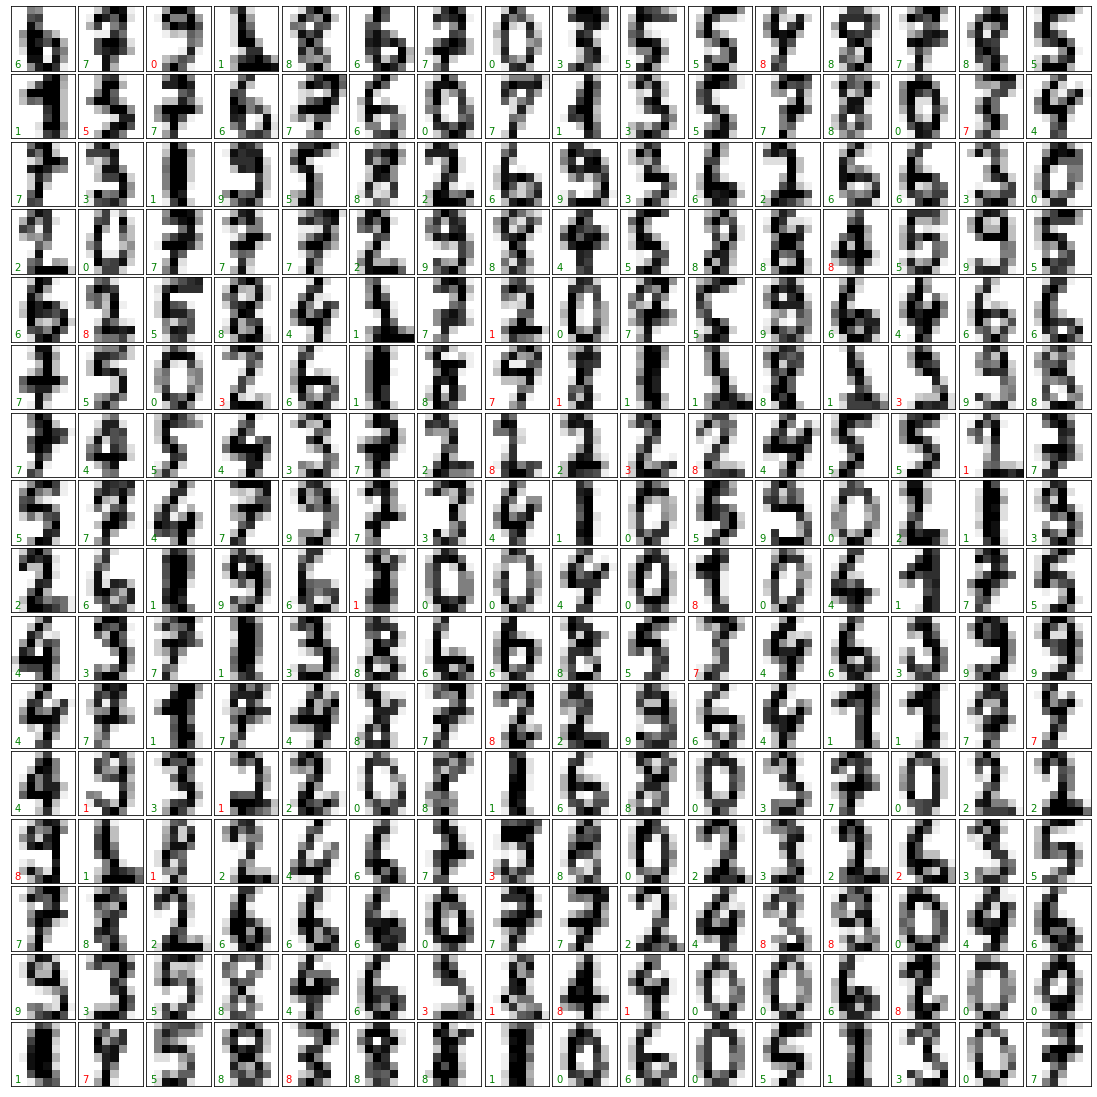

In [16]:
fig = plt.figure(figsize=(15, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(256):
    ax = fig.add_subplot(16, 16, i + 1, xticks=[], yticks=[])
    ax.imshow(x_test_gnb.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')
    
    if predicted_gnb[i] == expected_gnb[i]:
        ax.text(0, 7, str(predicted_gnb[i]), color='green')
    else:
        ax.text(0, 7, str(predicted_gnb[i]), color='red')

In [17]:
print(metrics.classification_report(expected_gnb, predicted_gnb))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       0.68      0.89      0.77        46
           2       0.97      0.62      0.75        47
           3       0.81      0.81      0.81        36
           4       1.00      0.80      0.89        50
           5       0.88      0.90      0.89        42
           6       1.00      0.95      0.98        44
           7       0.85      1.00      0.92        56
           8       0.60      0.81      0.69        47
           9       0.95      0.59      0.73        34

    accuracy                           0.85       450
   macro avg       0.87      0.84      0.84       450
weighted avg       0.87      0.85      0.85       450



In [18]:
d_gnb = [array for array in metrics.confusion_matrix(expected_gnb, predicted_gnb)]
data_matrix_gnb = {"0": d_gnb[0], "1": d_gnb[1], "2": d_gnb[2], "3": d_gnb[3], "4": d_gnb[4], \
                   "5": d_gnb[5], "6": d_gnb[6], "7": d_gnb[7], "8": d_gnb[8], "9": d_gnb[9]}
df_matrix_gnb = pd.DataFrame(data=data_matrix_gnb)
df_matrix_gnb

,0,1,2,3,4,5,6,7,8,9
0,48,0,0,0,0,0,0,0,0,1
1,0,41,5,0,3,1,1,0,6,3
2,0,0,29,0,0,0,1,0,0,0
3,0,0,3,29,0,1,0,0,0,3
4,0,0,0,0,40,0,0,0,0,0
5,0,0,0,1,1,38,0,0,2,1
6,0,0,0,0,0,0,42,0,0,0
7,0,0,0,2,3,2,0,56,1,2
8,0,5,10,3,3,0,0,0,38,4
9,0,0,0,1,0,0,0,0,0,20
